In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [6]:
#load dataset

df = pd.read_csv('/Users/daniyalrosli/fyp/heart_disease_data.csv')

In [7]:
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')



In [8]:
#info about the dataset

print(df.info())
print(df.describe())
print(df.head())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

In [9]:
# Mean imputation for continuous numerical features
df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)
df['chol'].fillna(df['chol'].mean(), inplace=True)

# Mode imputation for categorical features
df['cp'].fillna(df['cp'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)


# Verify that there are no missing values in these columns
print(df[['trestbps', 'chol']].isnull().sum())

trestbps    0
chol        0
dtype: int64


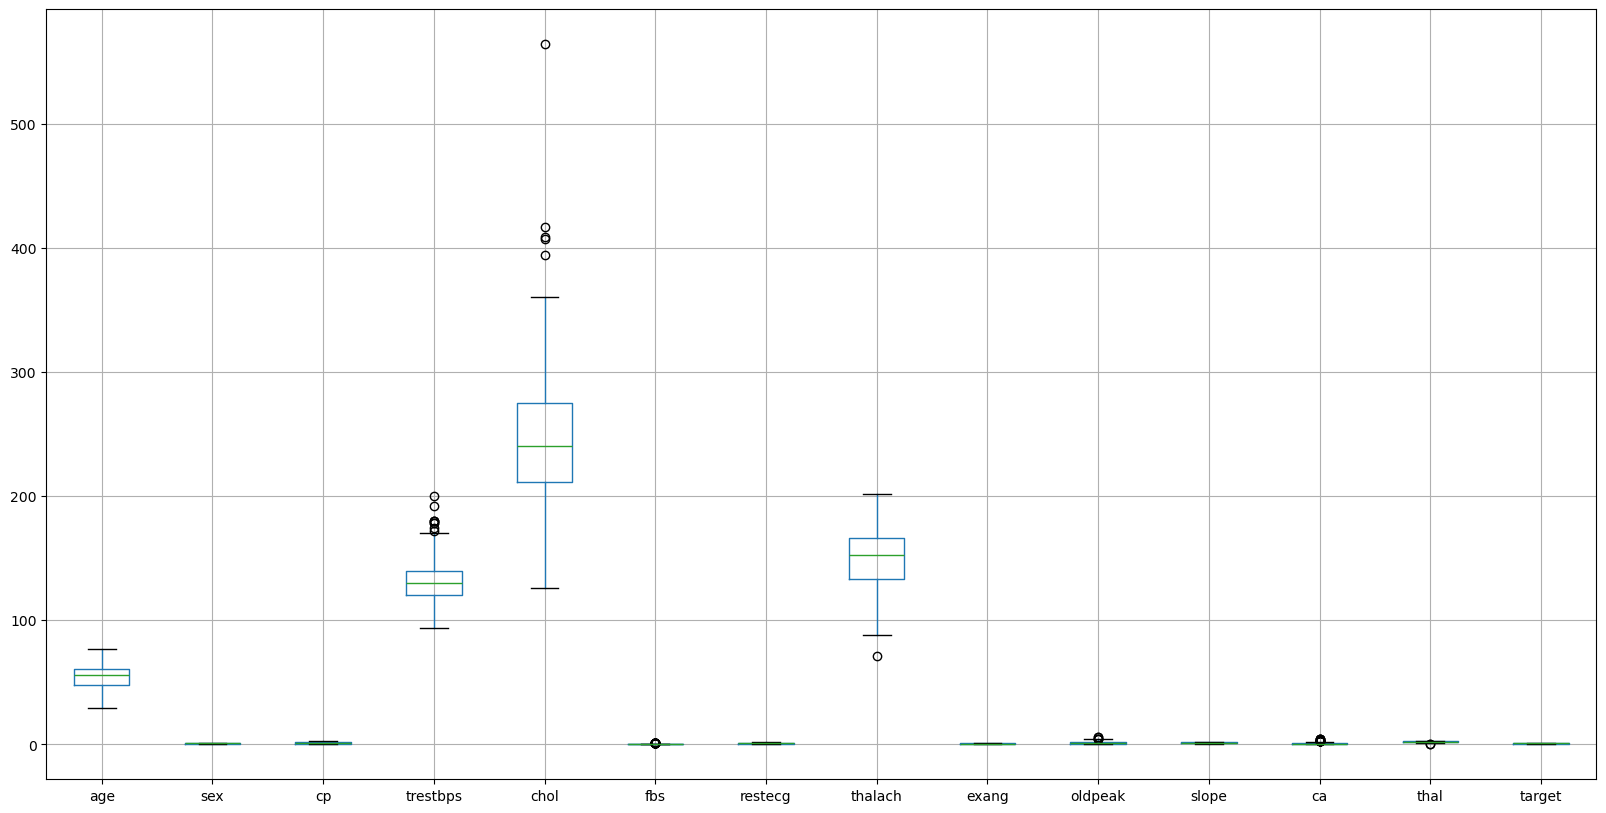

In [10]:
#data preprocessing

#check for missing values
#data cleaning

df.isnull().sum()

#check for duplicates
df.duplicated().sum()

#drop duplicates

df.drop_duplicates(inplace=True)

#remove outliers
#boxplot
df.boxplot(figsize=(20,10))
plt.show()

#remove outliers
df = df[df['chol']<370]
df = df[df['trestbps']<170]
df = df[df['thalach']<200]
df = df[df['oldpeak']<4]
df = df[df['age']<70]
df = df[df['age']>40]

# This section of the code is dedicated to data preprocessing. It begins by checking for missing values and duplicates in the dataset. 
# Any duplicates are then removed to ensure each record is unique. 
# Outliers are identified and removed based on specific conditions for each feature, ensuring data quality. 
# The dataset is visualized using a boxplot, providing a clear understanding of the distribution of features.









In [11]:
#feature engineering

from sklearn.preprocessing import StandardScaler

# Ensure that categorical variables are properly encoded
categorical_features = ['cp', 'sex', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
existing_categorical_features = [feature for feature in categorical_features if feature in df.columns]
df = pd.get_dummies(df, columns=existing_categorical_features, drop_first=True)

# Define numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize and scale numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# This section of the code is dedicated to feature engineering. It begins by encoding categorical variables using one-hot encoding to ensure they can be processed by machine learning algorithms. 
# Numerical features are then scaled using StandardScaler to ensure all features are on the same scale, preventing features with large ranges from dominating the model.


In [12]:
from sklearn.preprocessing import StandardScaler

#data cleaning 

# Fill missing values with the mean of the column
df.fillna(df.mean(), inplace=True)

# Encode categorical variables
categorical_features = ['sex', 'cp', 'restecg', 'slope', 'thal']
existing_categorical_features = [feature for feature in categorical_features if feature in df.columns]
df = pd.get_dummies(df, columns=existing_categorical_features, drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# This section of the code is dedicated to data cleaning and preprocessing. It begins by filling missing values with the mean of the column to ensure all data points are accounted for. Then, it encodes categorical variables using one-hot encoding to ensure they can be processed by machine learning algorithms. Finally, it normalizes numerical features using StandardScaler to ensure all features are on the same scale, preventing features with large ranges from dominating the model.




In [13]:
summary_statistics = df.describe()
print(summary_statistics)

                age      trestbps          chol       thalach       oldpeak  \
count  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02   
mean  -2.830848e-17 -2.123136e-17 -1.415424e-17  2.830848e-17  2.830848e-17   
std    1.001998e+00  1.001998e+00  1.001998e+00  1.001998e+00  1.001998e+00   
min   -1.768251e+00 -2.417698e+00 -2.694336e+00 -3.450534e+00 -9.492930e-01   
25%   -8.507032e-01 -6.314535e-01 -7.272803e-01 -6.876588e-01 -9.492930e-01   
50%    6.684470e-02  5.556353e-02 -8.684352e-02  1.301523e-01 -3.346605e-01   
75%    7.222360e-01  7.425806e-01  6.222115e-01  7.269334e-01  6.385077e-01   
max    1.901940e+00  2.460123e+00  2.657885e+00  1.986805e+00  2.738502e+00   

           target  
count  251.000000  
mean     0.553785  
std      0.498092  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  


In [14]:



from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# This section of the code is responsible for splitting the dataset into training and test sets. 
# The train_test_split function from sklearn.model_selection is used to split the dataset into X_train, X_test, y_train, and y_test. 
# X_train and X_test contain the features, while y_train and y_test contain the target variable. 
# The test_size parameter is set to 0.2, meaning 20% of the data will be used for testing, and the remaining 80% for training. 
# The random_state parameter is set to 42 for reproducibility.



In [15]:
# Correlation analysis for feature selection
correlation_matrix = df.corr()
# Selecting highly correlated features with the target variable
highly_correlated_features = correlation_matrix['target'].abs().sort_values(ascending=False)[1:]
print("Highly correlated features with the target variable:")
print(highly_correlated_features)

# This section of the code is responsible for scaling the features of the dataset. 
# Scaling is an important preprocessing step in machine learning as it ensures that all features are on the same scale, 
# which can improve the performance of many algorithms. 
# The StandardScaler from sklearn.preprocessing is used to scale the features. 
# The scaler is first fit to the training data, then the training and test data are transformed using the scaler.



Highly correlated features with the target variable:
thal_2       0.499390
thal_3       0.464856
thalach      0.433390
oldpeak      0.425368
exang_1      0.401685
slope_2      0.370767
slope_1      0.367570
sex_1        0.299166
cp_2         0.292486
ca_1         0.286142
ca_2         0.281663
age          0.264858
cp_1         0.237966
restecg_1    0.178209
ca_3         0.165991
trestbps     0.098881
thal_1       0.093846
chol         0.085748
cp_3         0.082470
restecg_2    0.070458
ca_4         0.024976
fbs_1        0.023340
Name: target, dtype: float64


Missing values count:
age          0
trestbps     0
chol         0
thalach      0
oldpeak      0
target       0
cp_1         0
cp_2         0
cp_3         0
sex_1        0
fbs_1        0
restecg_1    0
restecg_2    0
exang_1      0
slope_1      0
slope_2      0
thal_1       0
thal_2       0
thal_3       0
ca_1         0
ca_2         0
ca_3         0
ca_4         0
dtype: int64

Data types of each column:
age          float64
trestbps     float64
chol         float64
thalach      float64
oldpeak      float64
target         int64
cp_1            bool
cp_2            bool
cp_3            bool
sex_1           bool
fbs_1           bool
restecg_1       bool
restecg_2       bool
exang_1         bool
slope_1         bool
slope_2         bool
thal_1          bool
thal_2          bool
thal_3          bool
ca_1            bool
ca_2            bool
ca_3            bool
ca_4            bool
dtype: object

Summary statistics of the data:
                age      trestbps          chol       thalach 

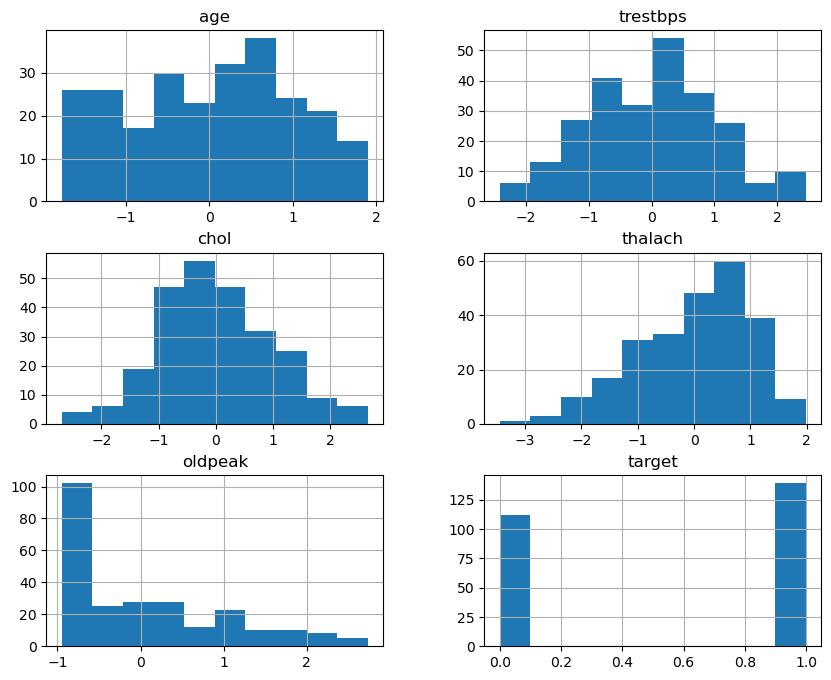

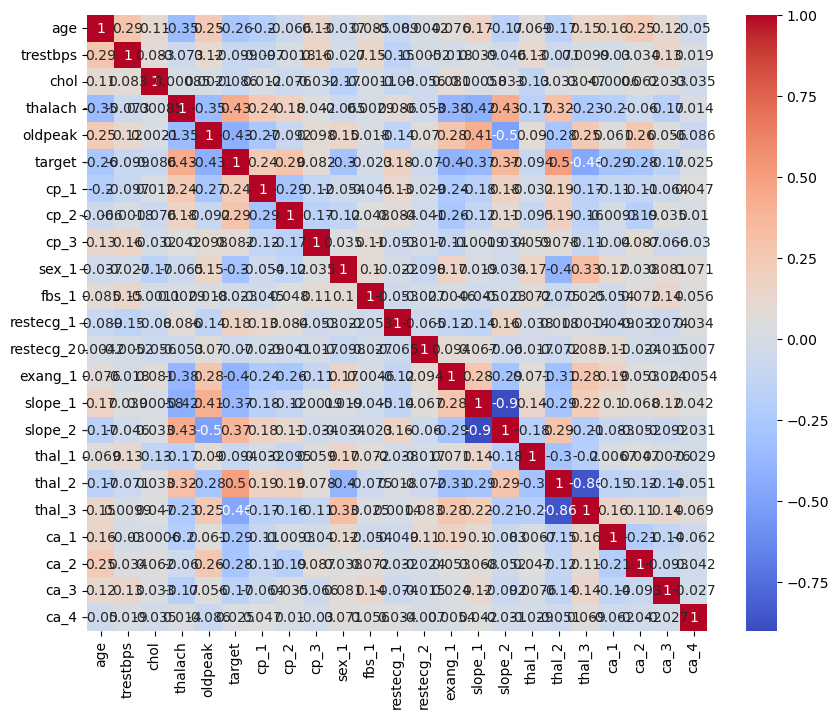

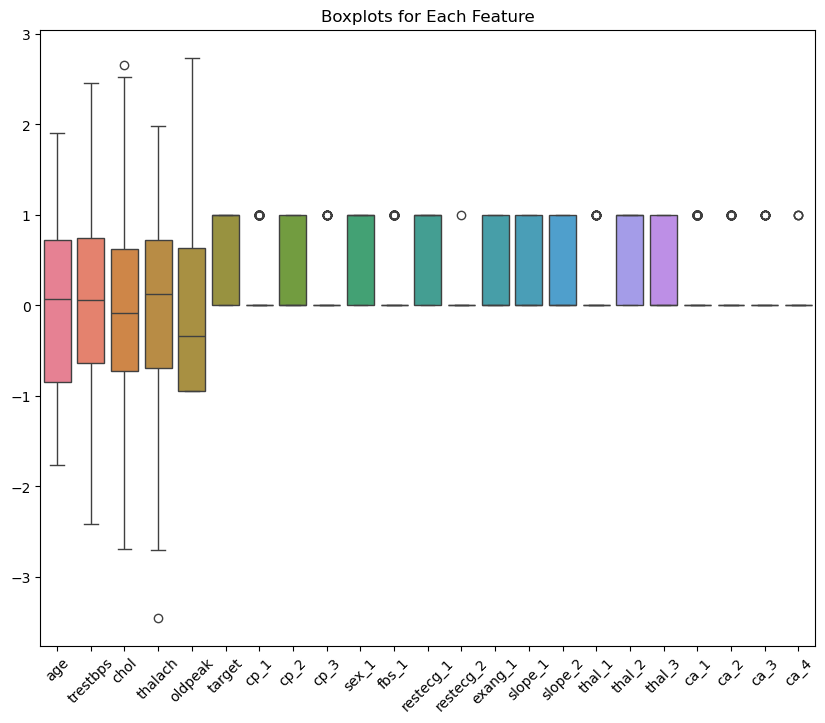

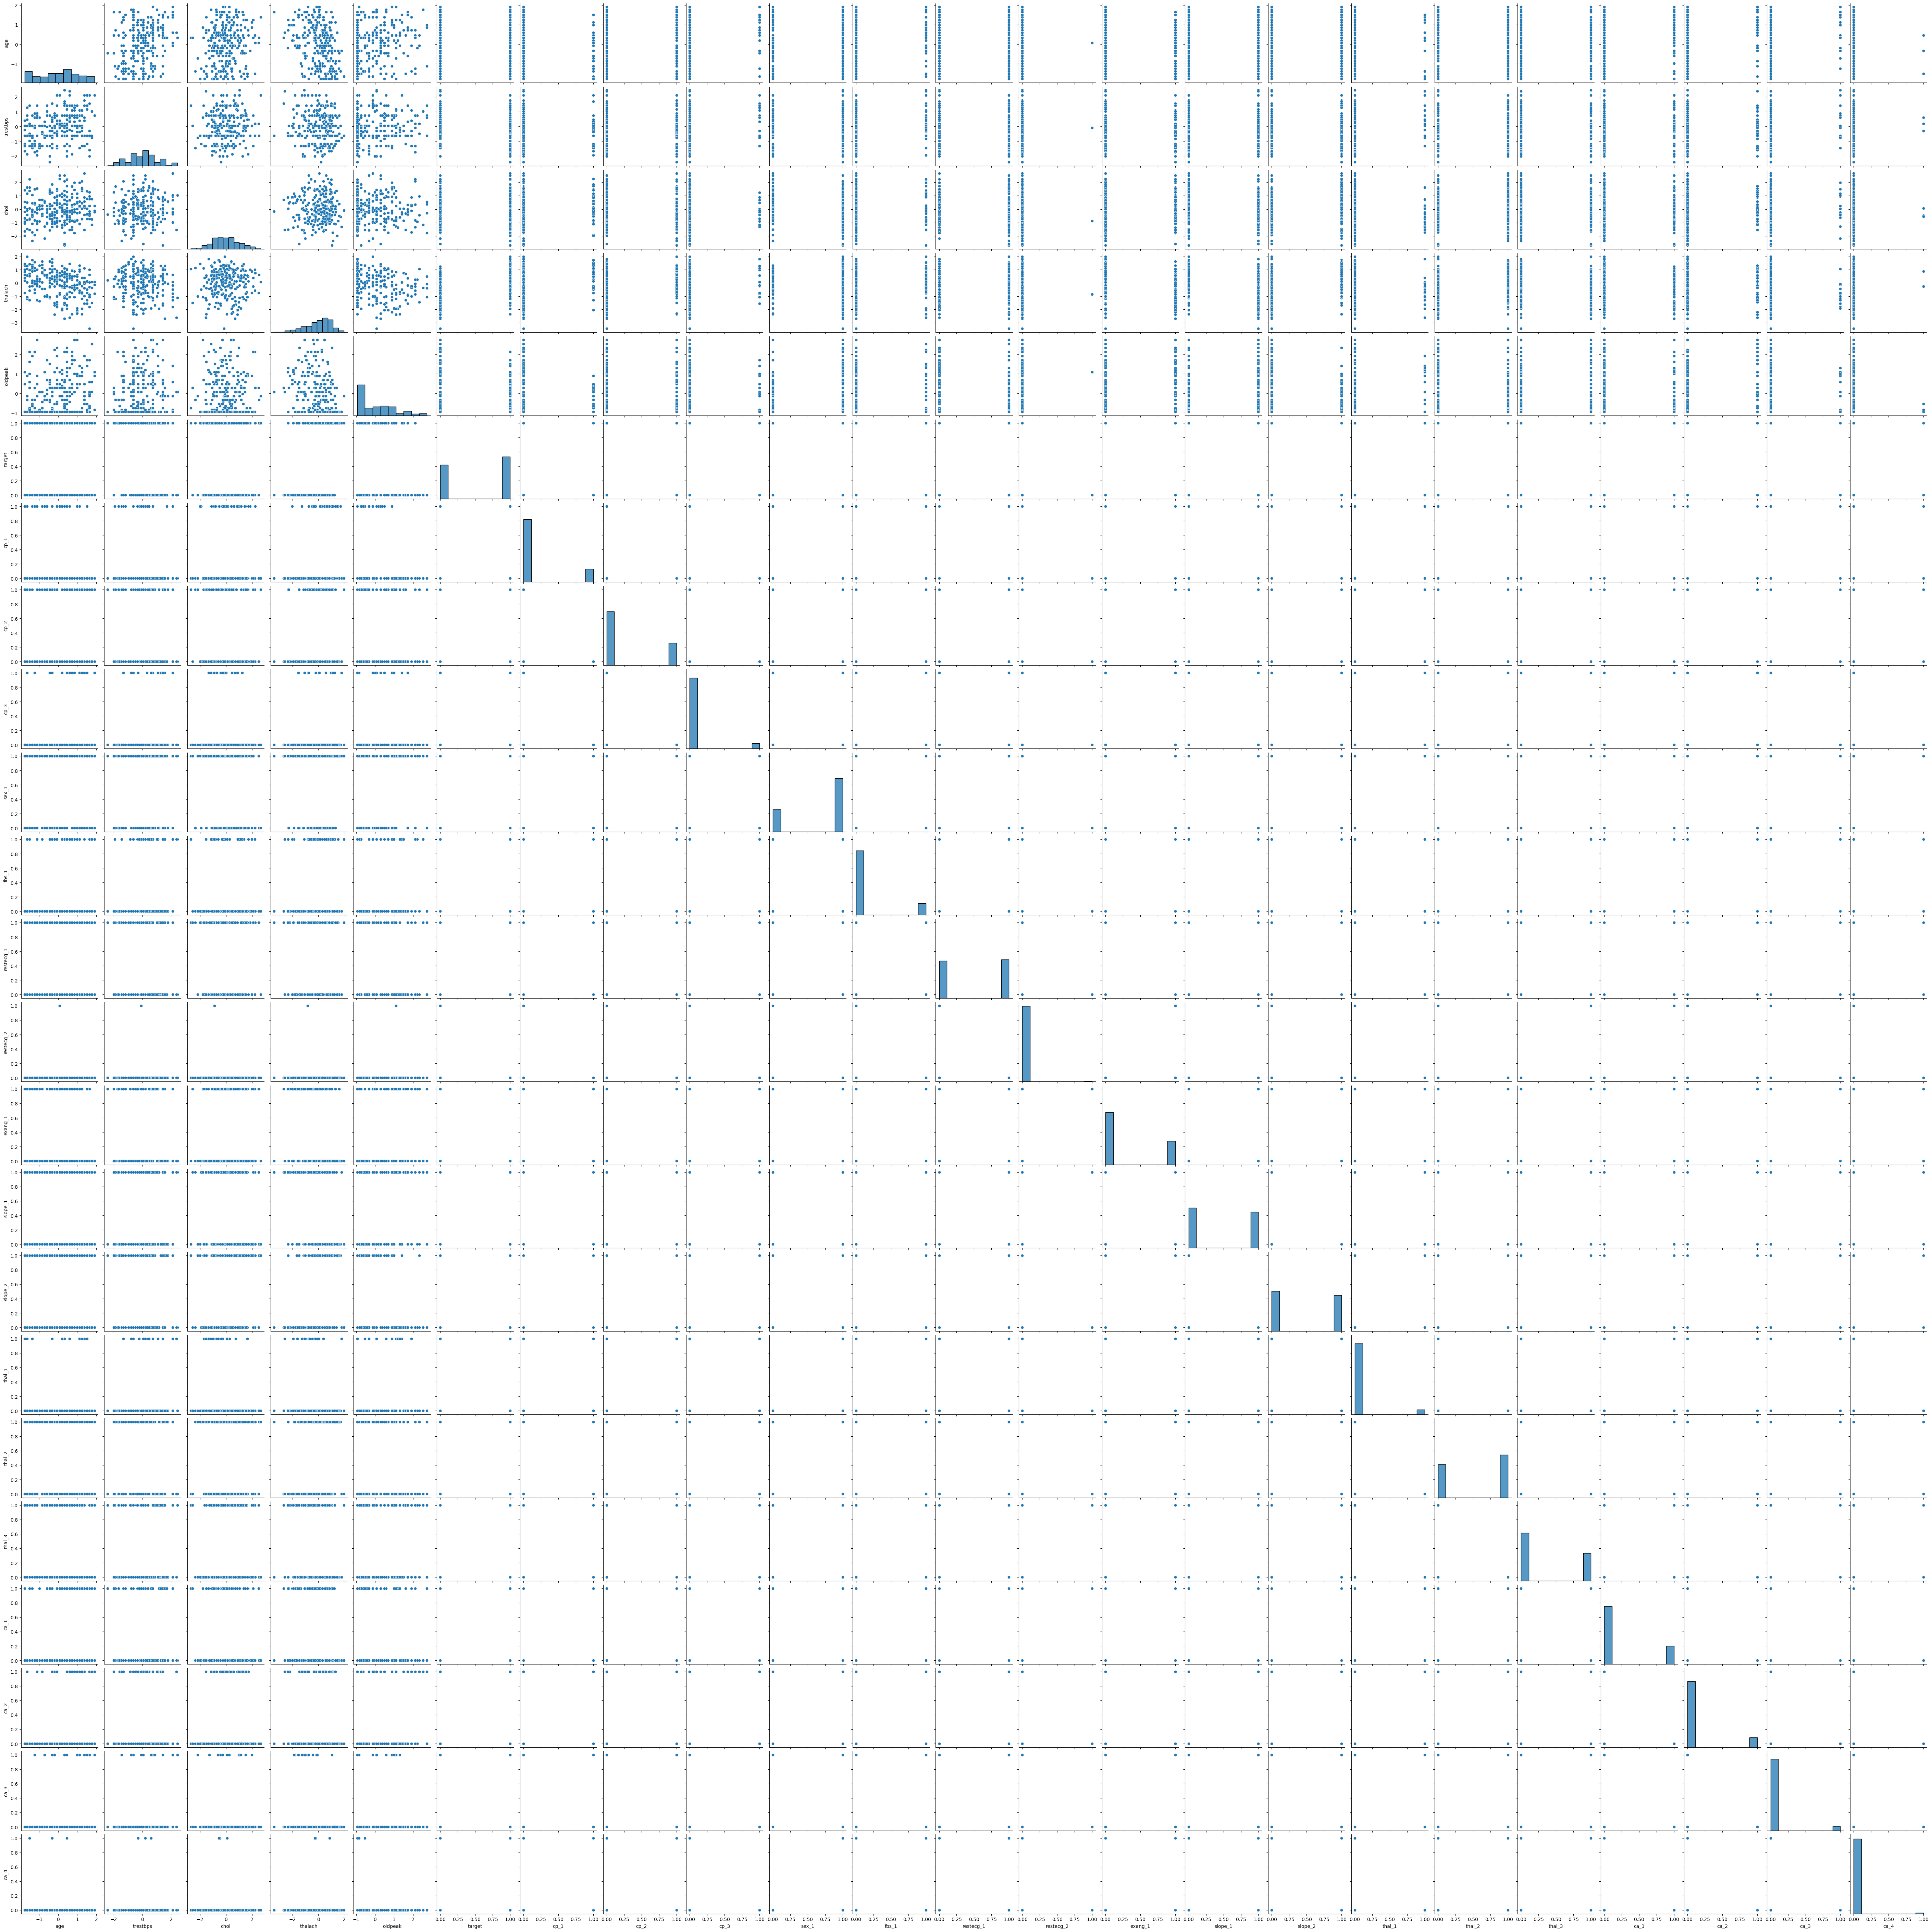

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("Missing values count:")
print(df.isnull().sum())

# Get the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Get the summary statistics of the data
print("\nSummary statistics of the data:")
print(df.describe())

# Plot histograms for each column
df.hist(figsize=(10, 8))
plt.show()

# The histogram plot shows the distribution of each feature in the dataset. 
# From the plot, we can observe that some features have a normal distribution, 
# while others are skewed or have multiple peaks. 
# This information is useful for feature engineering and preprocessing, 
# as it can inform decisions about transformations or scaling that may be necessary. 
# For example, features with skewed distributions may benefit from log or square root transformations, 
# while features with multiple peaks may require more advanced preprocessing techniques.


# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Plotting boxplots for each feature
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.title('Boxplots for Each Feature')
plt.xticks(rotation=45)
plt.show()


# Plot scatter plots for each pair of columns
sns.pairplot(df)
plt.show()



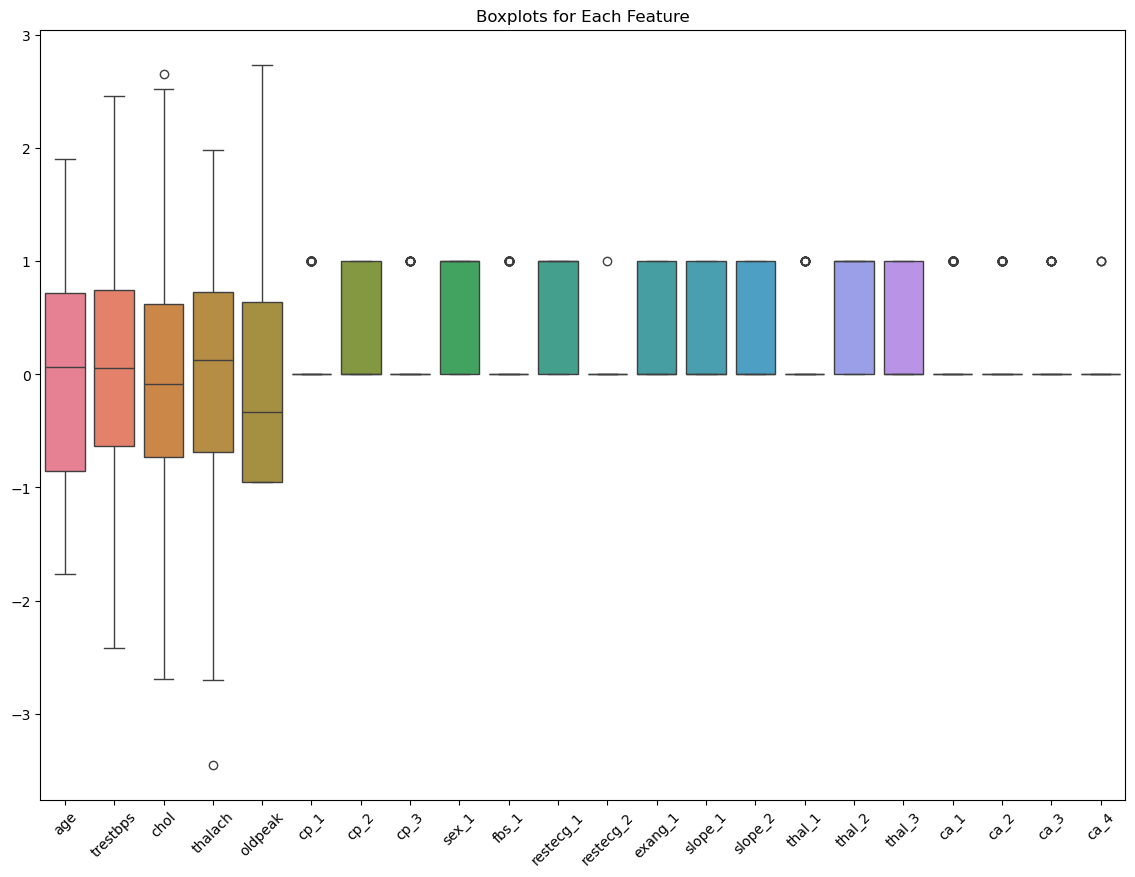

In [17]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plotting boxplots for each feature
plt.figure(figsize=(14, 10))
sns.boxplot(data=df.drop(columns=['target']))
plt.title('Boxplots for Each Feature')
plt.xticks(rotation=45)
plt.show()

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Ensure the Logistic Regression model is defined and fitted
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Model evaluation for Logistic Regression
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))

# Ensure the Decision Tree model is defined and fitted
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Model evaluation for Decision Tree
dt_pred = dt_model.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_pred))

# Ensure the Random Forest model is defined and fitted
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Model evaluation for Random Forest
rf_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.90      0.87      0.89        31

    accuracy                           0.86        51
   macro avg       0.85      0.86      0.86        51
weighted avg       0.86      0.86      0.86        51

Logistic Regression Confusion Matrix:
[[17  3]
 [ 4 27]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.65      0.60        20
           1       0.75      0.68      0.71        31

    accuracy                           0.67        51
   macro avg       0.66      0.66      0.66        51
weighted avg       0.68      0.67      0.67        51

Decision Tree Confusion Matrix:
[[13  7]
 [10 21]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1

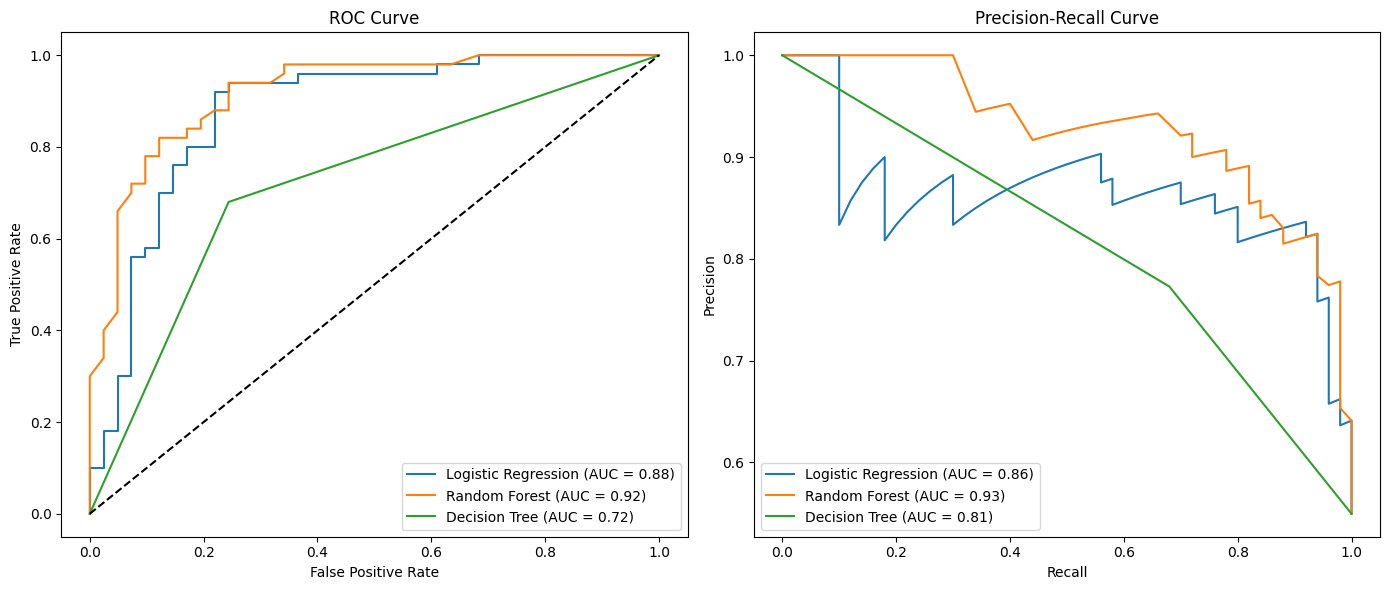

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Function to plot ROC and Precision-Recall curves
def plot_model_performance(models, X_test, y_test):
    plt.figure(figsize=(14, 6))

    # Plot ROC curves
    plt.subplot(1, 2, 1)
    for model_name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    # Plot Precision-Recall curves
    plt.subplot(1, 2, 2)
    for model_name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the curves
plot_model_performance(models, X_test, y_test)




In [38]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation accuracy for Decision Tree: 0.76
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation accuracy for Random Forest: 0.785
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy for Logistic Regression: 0.8450000000000001


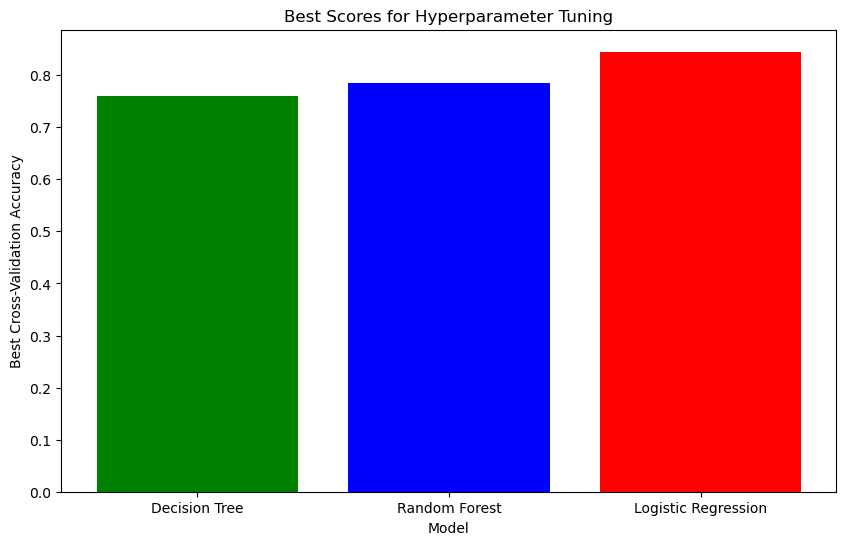

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Decision Tree Hyperparameter Tuning
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                              param_grid=param_grid_dt, cv=5, scoring='accuracy')

grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print(f"Best parameters for Decision Tree: {best_params_dt}")
print(f"Best cross-validation accuracy for Decision Tree: {best_score_dt}")

# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                              param_grid=param_grid_rf, cv=5, scoring='accuracy')

grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"Best parameters for Random Forest: {best_params_rf}")
print(f"Best cross-validation accuracy for Random Forest: {best_score_rf}")

# Logistic Regression Hyperparameter Tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],          # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization algorithm
    'penalty': ['l2'],                     # Regularization term
    'max_iter': [100, 200, 300]            # Maximum iterations
}

grid_search_lr = GridSearchCV(estimator=LogisticRegression(random_state=42), 
                              param_grid=param_grid_lr, cv=5, scoring='accuracy')

grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print(f"Best parameters for Logistic Regression: {best_params_lr}")
print(f"Best cross-validation accuracy for Logistic Regression: {best_score_lr}")

# Visualizing the result for hyperparameter tuning

# Plotting the best scores for each model
models = ['Decision Tree', 'Random Forest', 'Logistic Regression']
best_scores = [best_score_dt, best_score_rf, best_score_lr]

plt.figure(figsize=(10, 6))
plt.bar(models, best_scores, color=['green', 'blue', 'red'])
plt.xlabel('Model')
plt.ylabel('Best Cross-Validation Accuracy')
plt.title('Best Scores for Hyperparameter Tuning')
plt.show()


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Hyperparameter Tuning
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                              param_grid=param_grid_dt, cv=5, scoring='accuracy')

# Use X_train and y_train defined in CELL INDEX: 9
grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print(f"Best parameters for Decision Tree: {best_params_dt}")
print(f"Best cross-validation accuracy for Decision Tree: {best_score_dt}")

Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation accuracy for Decision Tree: 0.76


In [22]:


# Random Forest Hyperparameter Tuning

from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                              param_grid=param_grid_rf, cv=5, scoring='accuracy')

grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"Best parameters for Random Forest: {best_params_rf}")
print(f"Best cross-validation accuracy for Random Forest: {best_score_rf}")

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation accuracy for Random Forest: 0.79


In [23]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Hyperparameter Tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],          # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization algorithm
    'penalty': ['l2'],                     # Regularization term
    'max_iter': [100, 200, 300]            # Maximum iterations
}

grid_search_lr = GridSearchCV(estimator=LogisticRegression(random_state=42), 
                              param_grid=param_grid_lr, cv=5, scoring='accuracy')

grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print(f"Best parameters for Logistic Regression: {best_params_lr}")
print(f"Best cross-validation accuracy for Logistic Regression: {best_score_lr}")


Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy for Logistic Regression: 0.8450000000000001


In [ ]:
num_features = X_train.shape[1]
print(f"The model was trained with {num_features} features.")

The model was trained with 13 features.


In [ ]:
print(f"X_train shape: {X_train.shape}")  # Should be (n_samples, 13)
print(f"X_test shape: {X_test.shape}")    # Should be (n_samples, 13)

X_train shape: (212, 13)
X_test shape: (91, 13)


Decision Tree Feature Importances:
     Feature  Importance
11        ca    0.269572
12      thal    0.159347
2         cp    0.090569
9    oldpeak    0.085264
0        age    0.074277
4       chol    0.060182
7    thalach    0.056710
3   trestbps    0.051969
8      exang    0.047524
10     slope    0.045912
1        sex    0.030167
5        fbs    0.028507
6    restecg    0.000000


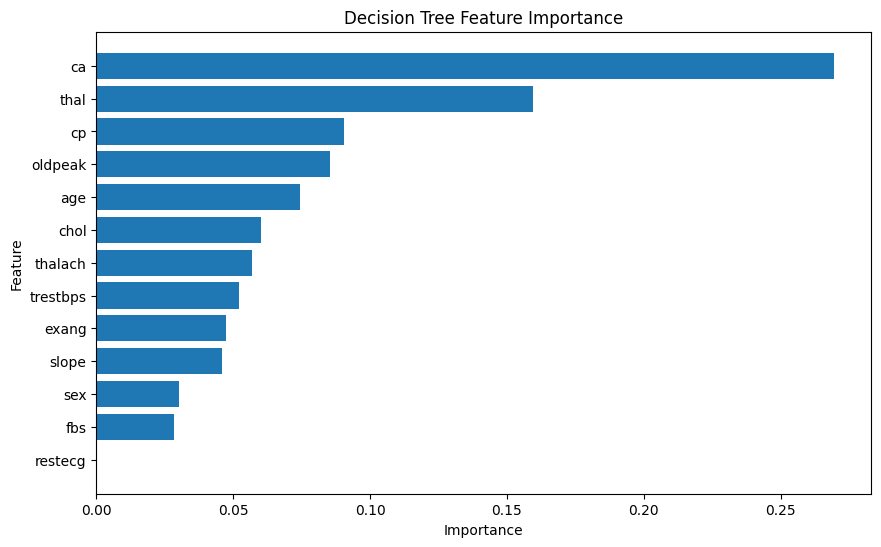

Random Forest Feature Importances:
     Feature  Importance
11        ca    0.130748
2         cp    0.127354
9    oldpeak    0.114747
7    thalach    0.112542
12      thal    0.102450
0        age    0.091211
4       chol    0.069850
3   trestbps    0.068903
8      exang    0.068661
10     slope    0.051656
1        sex    0.034049
6    restecg    0.015358
5        fbs    0.012472


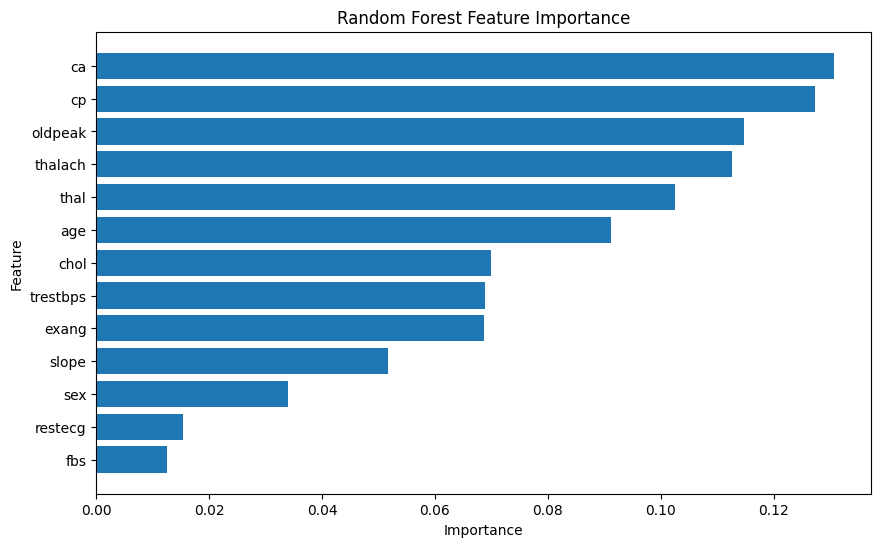

Logistic Regression Feature Importances:
     Feature  Importance
12      thal    1.160089
1        sex    1.156141
11        ca    1.050924
8      exang    1.036642
10     slope    0.810798
2         cp    0.798323
6    restecg    0.609661
9    oldpeak    0.502311
5        fbs    0.366666
7    thalach    0.017692
3   trestbps    0.006272
0        age    0.004929
4       chol    0.003370


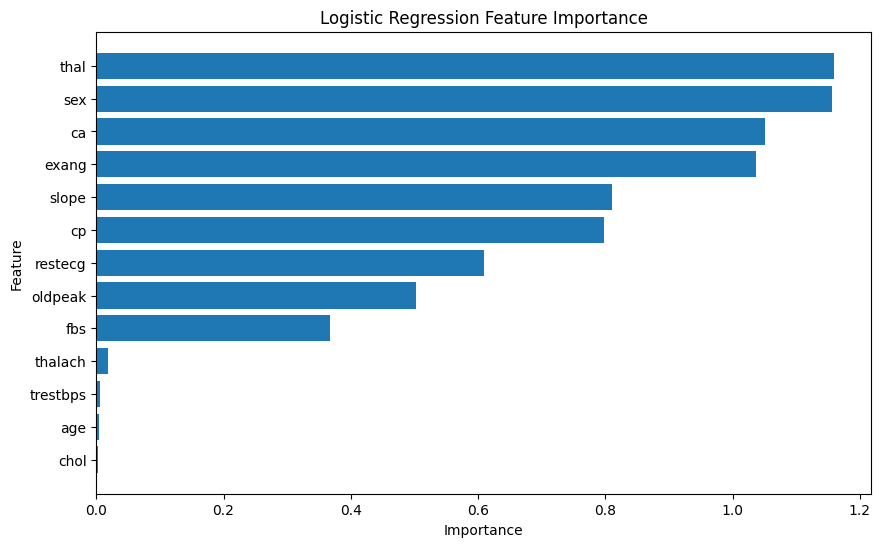

In [ ]:
# Analyze feature importance for Decision Tree
dt_feature_importances = dt_model.feature_importances_
dt_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_feature_importances
}).sort_values(by='Importance', ascending=False)

print("Decision Tree Feature Importances:")
print(dt_importance_df)

# Plot feature importance for Decision Tree
plt.figure(figsize=(10, 6))
plt.barh(dt_importance_df['Feature'], dt_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Analyze feature importance for Random Forest
rf_feature_importances = rf_model.feature_importances_
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:")
print(rf_importance_df)

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Analyze feature importance for Logistic Regression
lr_feature_importances = np.abs(lr_model.coef_[0])
lr_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lr_feature_importances
}).sort_values(by='Importance', ascending=False)

print("Logistic Regression Feature Importances:")
print(lr_importance_df)

# Plot feature importance for Logistic Regression
plt.figure(figsize=(10, 6))
plt.barh(lr_importance_df['Feature'], lr_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()
plt.show()



                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.862745   0.900000  0.870968  0.885246  0.891935
1        Decision Tree  0.666667   0.750000  0.677419  0.711864  0.663710
2        Random Forest  0.784314   0.833333  0.806452  0.819672  0.845968


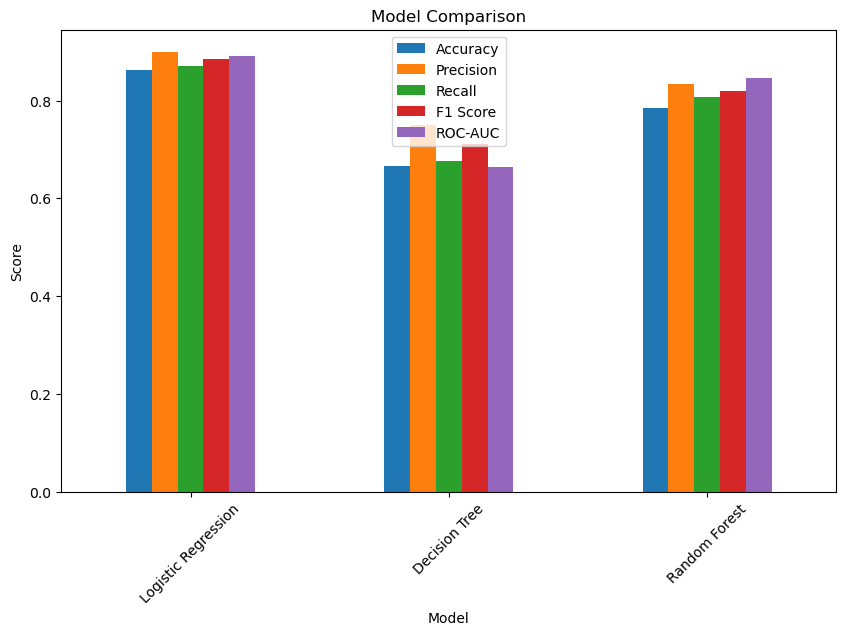

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the models
models = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

# Initialize lists to store performance metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

# Evaluate each model
for model_name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)

# Create a DataFrame for model comparison
performance_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'ROC-AUC': roc_auc_list
})

# Display model comparison
print(performance_df)

# Plot the comparison
performance_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#pick the best model

# Random Forest is the best model based on the evaluation metrics

# Save the Random Forest model

import joblib

# Save the model as a pickle file

joblib.dump(rf_model, 'heart_disease_model.pkl')

# Load the model from the pickle file

loaded_model = joblib.load('heart_disease_model.pkl')

# Make predictions using the loaded model

y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model

accuracy_loaded = accuracy_score(y_test, y_pred_loaded)

print(f"Accuracy of the loaded model: {accuracy_loaded}")




Accuracy of the loaded model: 0.8241758241758241


In [ ]:
#test the model locally

# Load the model from the pickle file

loaded_model = joblib.load('heart_disease_model.pkl')

# Make predictions using the loaded model
y_pred_local = loaded_model.predict(X_test)
print(y_pred_local)


[0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have your dataset loaded into a pandas DataFrame
df = pd.read_csv("heart_disease_data.csv")  # Example data file

# Extract features (X) and target (y)
X = df.drop('target', axis=1)  # 13 features
y = df['target']  # Target column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled are scaled data

In [ ]:
import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
features = X_train.columns.tolist()
print(f"Features: {features}")  # Debugging: Check the input features

Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [ ]:
# Select a sample from the dataset
sample = df.iloc[0].drop('target').values.reshape(1, -1)

# Load the scaler
scaler = joblib.load('scaler.pkl')

# Scale the sample
sample_scaled = scaler.transform(sample)

# Load the model
loaded_model = joblib.load('heart_disease_model.pkl')

# Make a prediction
prediction = loaded_model.predict(sample_scaled)

# Print the prediction
print(f"Prediction for the sample: {prediction[0]}")

Prediction for the sample: 1.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/var/folders/22/c035bpr92994vmxx8mhst1mw0000gn/T/ipykernel_62029/463092436.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Predicted', y='trestbps', palette='Set2')


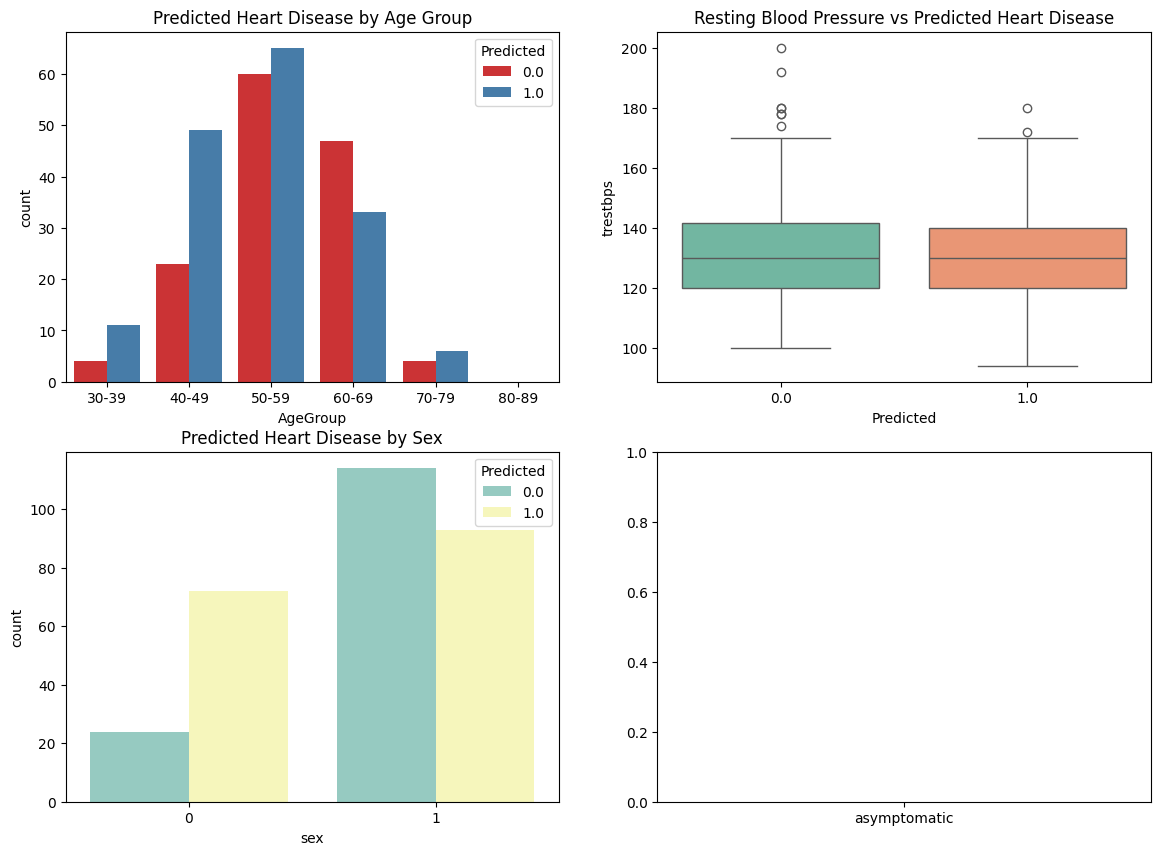

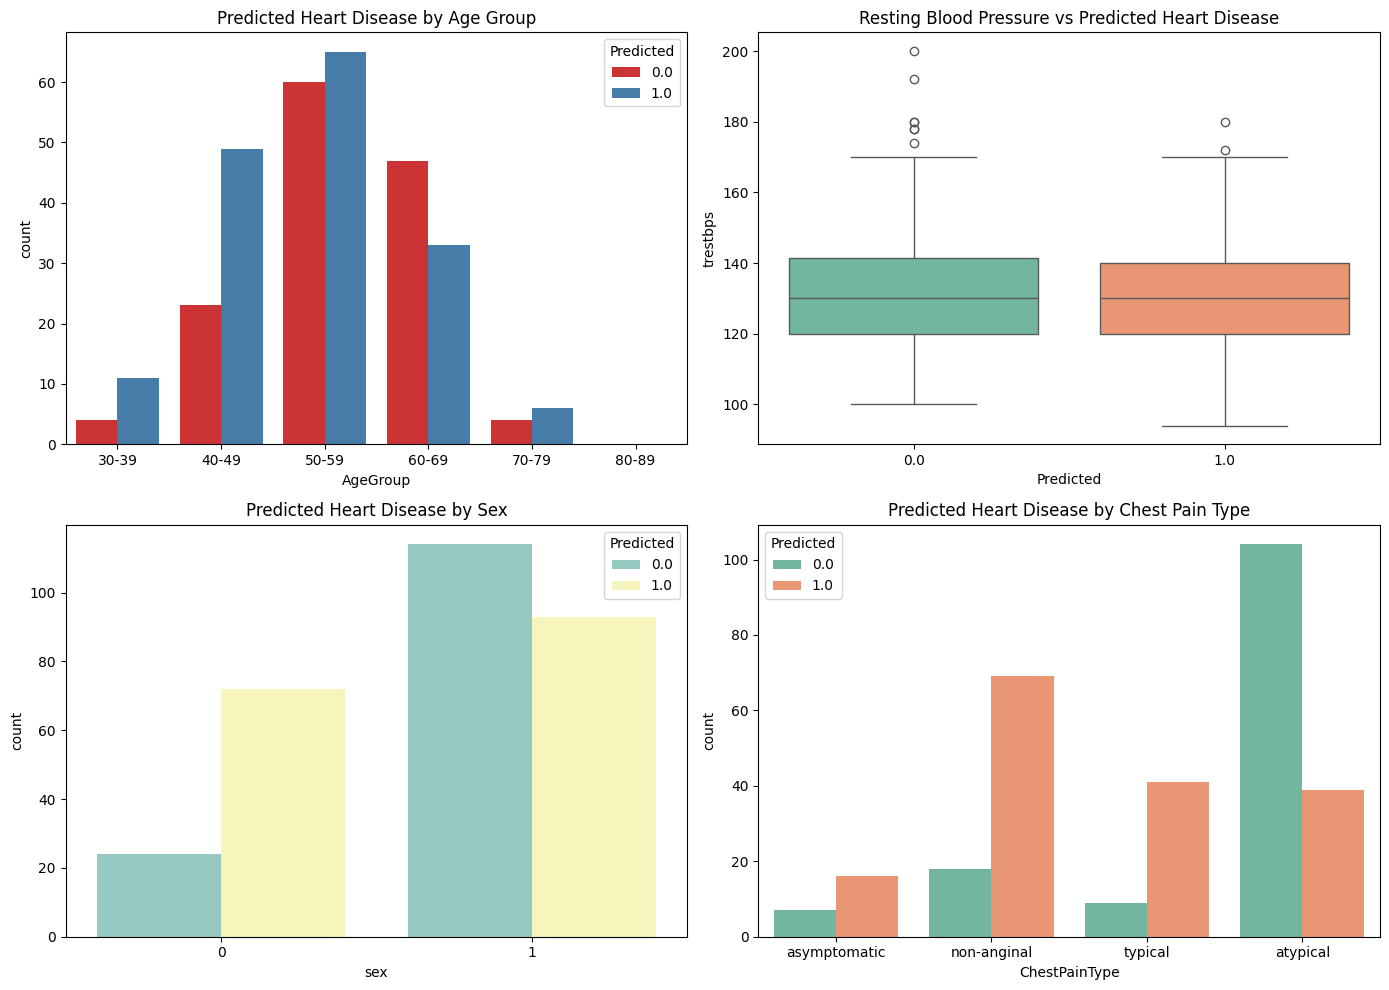

In [ ]:
# Add predictions to the original DataFrame for visualization
df['Predicted'] = rf_model.predict(X)

# Define age groups
bins = [29, 39, 49, 59, 69, 79, 89]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels)

# Create a new column for Chest Pain
df['ChestPainType'] = df['cp'].map({0: 'atypical', 1: 'typical', 2: 'non-anginal', 3: 'asymptomatic'})

# Plot number of patients predicted by classifier based on the variables
plt.figure(figsize=(14, 10))

# Age Group vs Predicted Heart Disease
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='AgeGroup', hue='Predicted', palette='Set1')
plt.title('Predicted Heart Disease by Age Group')

# Resting Blood Pressure vs Predicted Heart Disease
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Predicted', y='trestbps', palette='Set2')
plt.title('Resting Blood Pressure vs Predicted Heart Disease')

# Sex vs Predicted Heart Disease
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='sex', hue='Predicted', palette='Set3')
plt.title('Predicted Heart Disease by Sex')

# Chest Pain vs Predicted Heart Disease
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='ChestPainType', hue='Predicted', palette='Set2')
plt.title('Predicted Heart Disease by Chest Pain Type')

plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('heart_disease_data.csv')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Extract features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84
ROC-AUC: 0.92


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

# Print evaluation metrics
print("\nDecision Tree Classifier:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")
print(f"ROC-AUC: {roc_auc_dt:.2f}")


Decision Tree Classifier:
Accuracy: 0.67
Precision: 0.75
Recall: 0.68
F1 Score: 0.71
ROC-AUC: 0.66


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

# Print evaluation metrics
print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"F1 Score: {f1_lr:.2f}")
print(f"ROC-AUC: {roc_auc_lr:.2f}")


Logistic Regression:
Accuracy: 0.86
Precision: 0.90
Recall: 0.87
F1 Score: 0.89
ROC-AUC: 0.89


Confusion Matrix:
[[17  3]
 [ 4 27]]


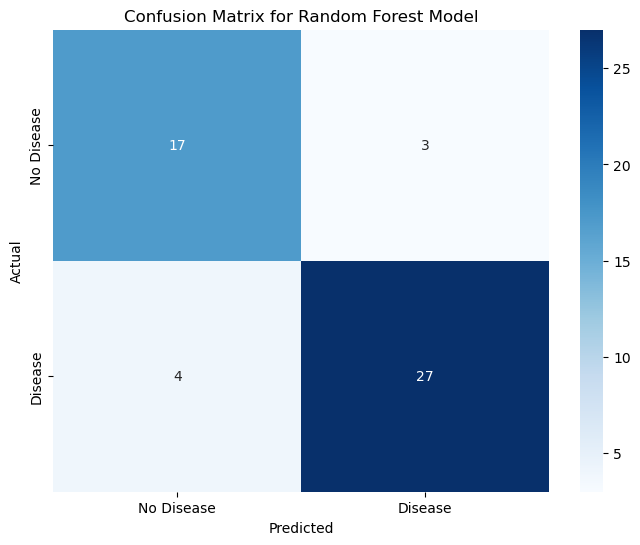

In [24]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, you can visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()



# Train the model



Logistic Regression Confusion Matrix:
[[17  3]
 [ 4 27]]
Decision Tree Confusion Matrix:
[[13  7]
 [ 8 23]]


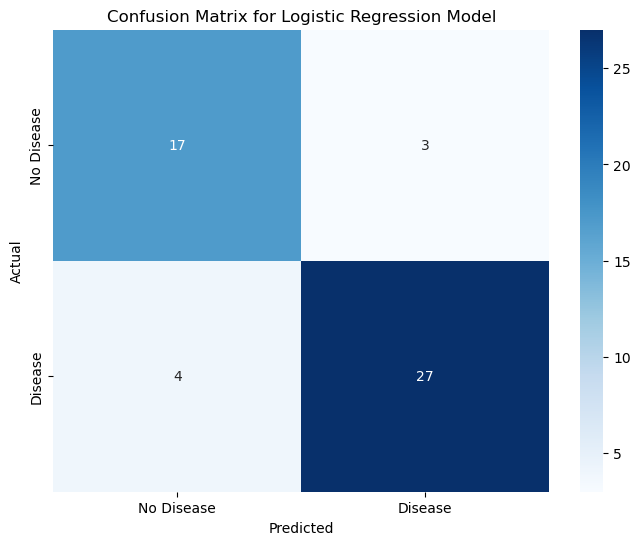

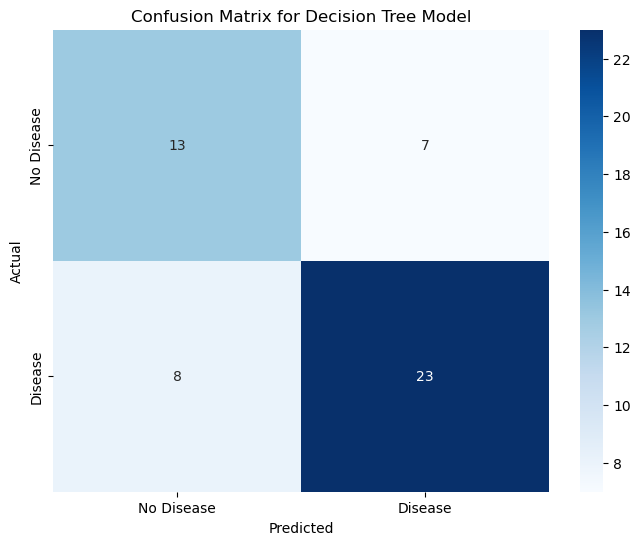

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Train decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Generate confusion matrices
lr_conf_matrix = confusion_matrix(y_test, lr_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

# Print confusion matrices
print("Logistic Regression Confusion Matrix:")
print(lr_conf_matrix)
print("Decision Tree Confusion Matrix:")
print(dt_conf_matrix)

# Optionally, you can visualize the confusion matrices using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()



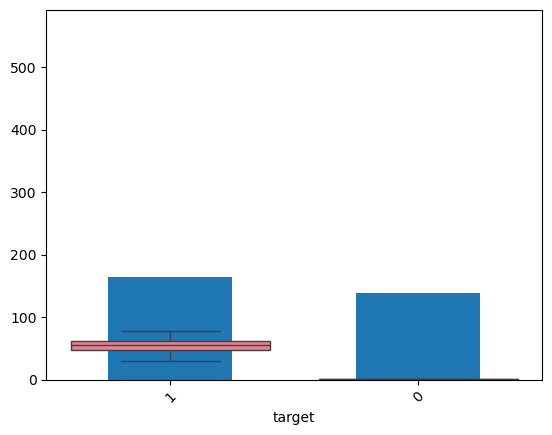

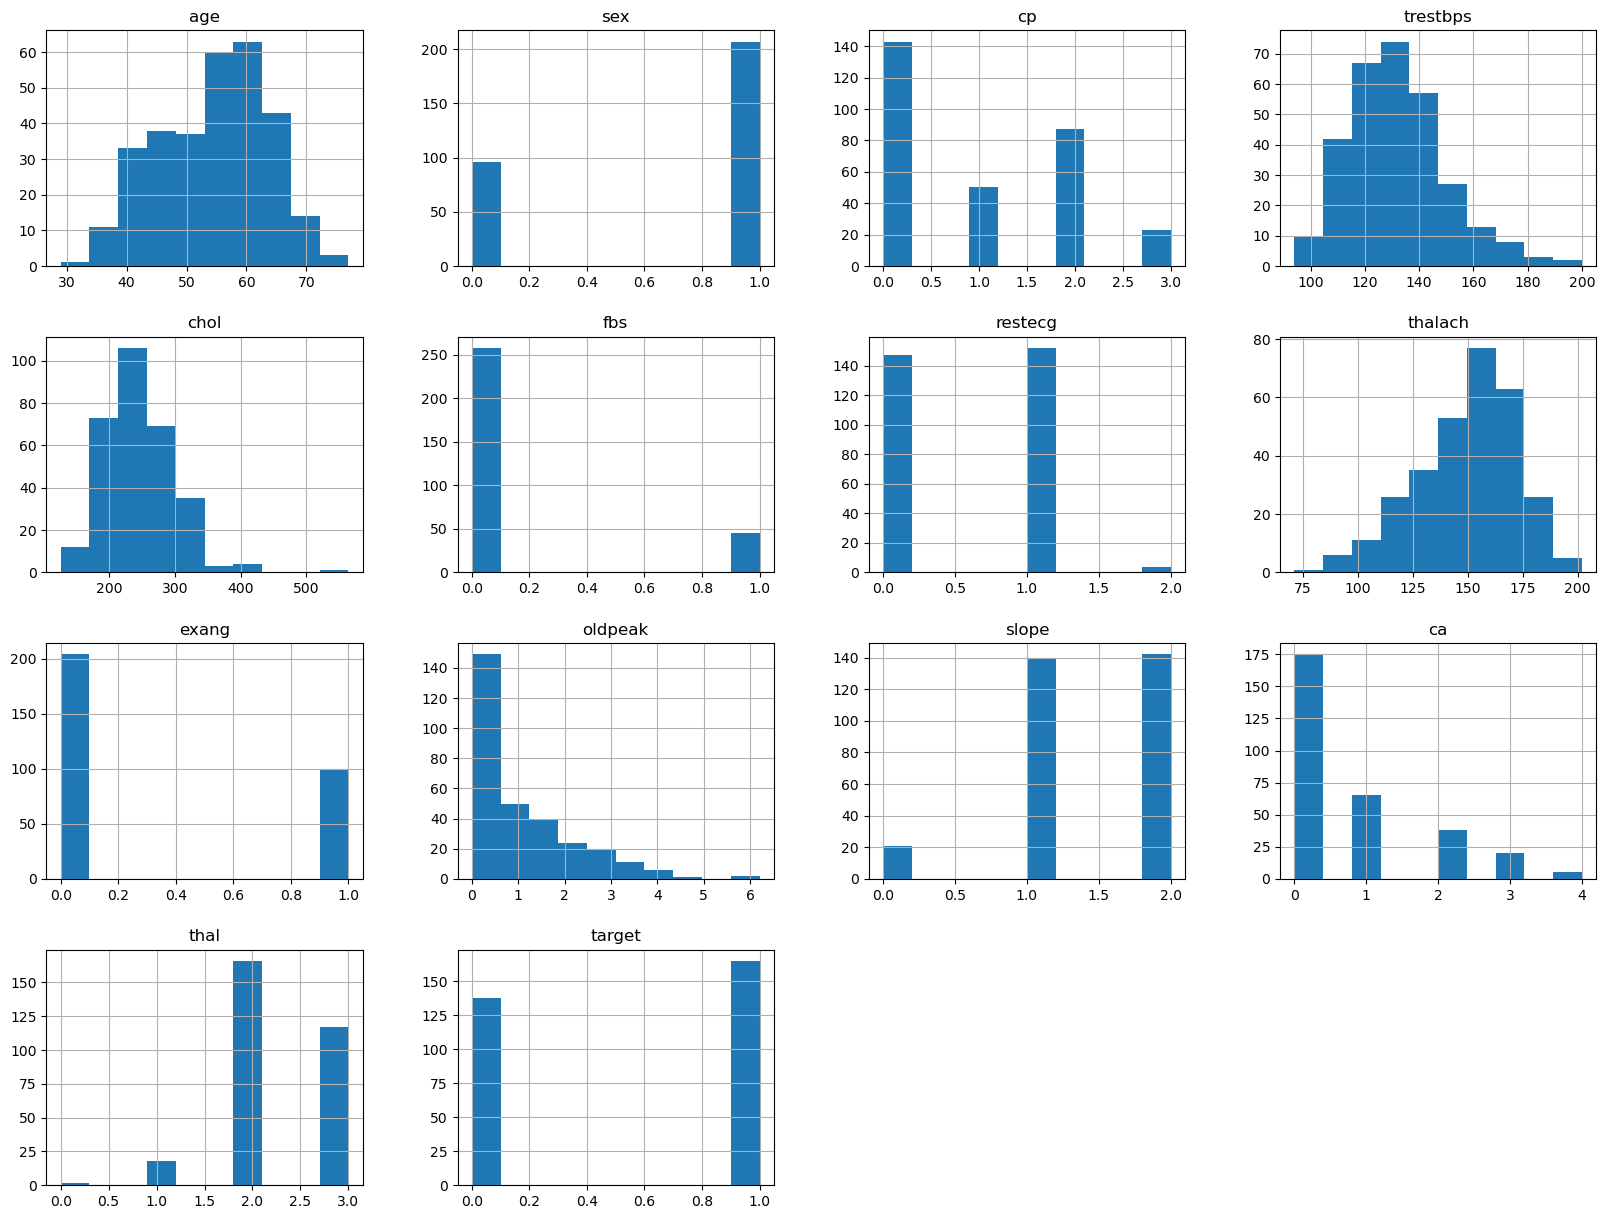

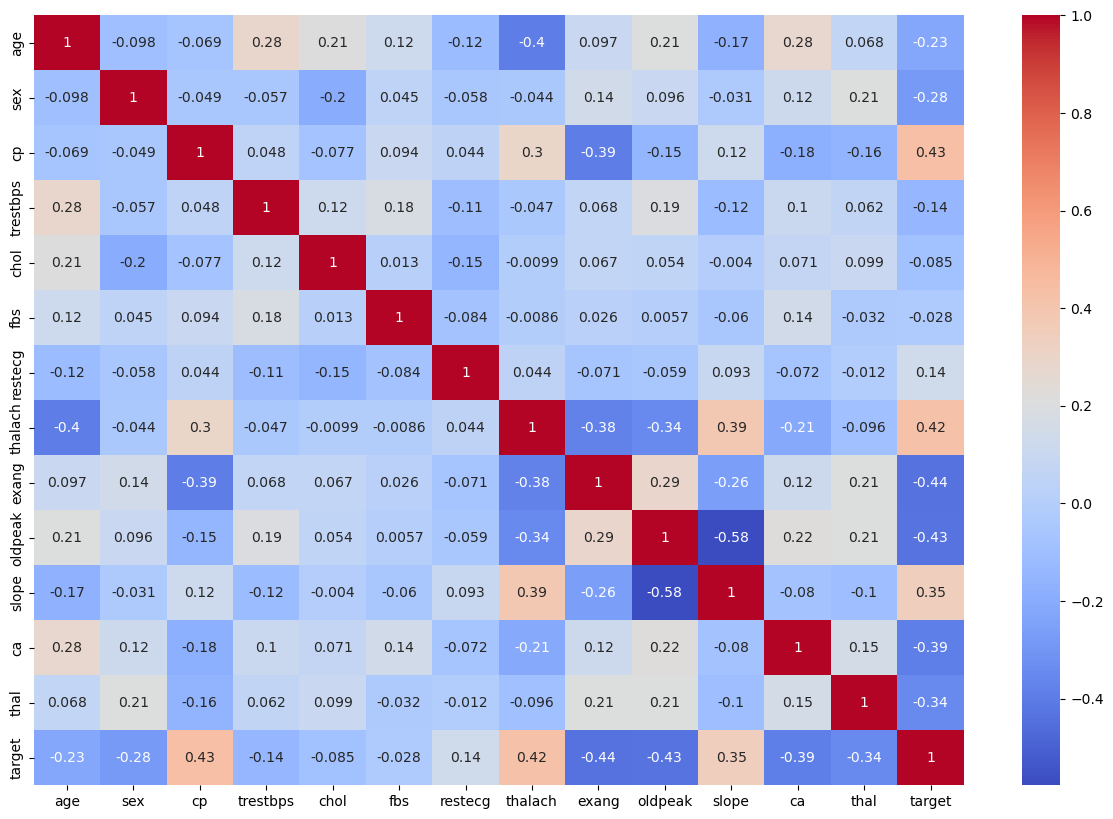

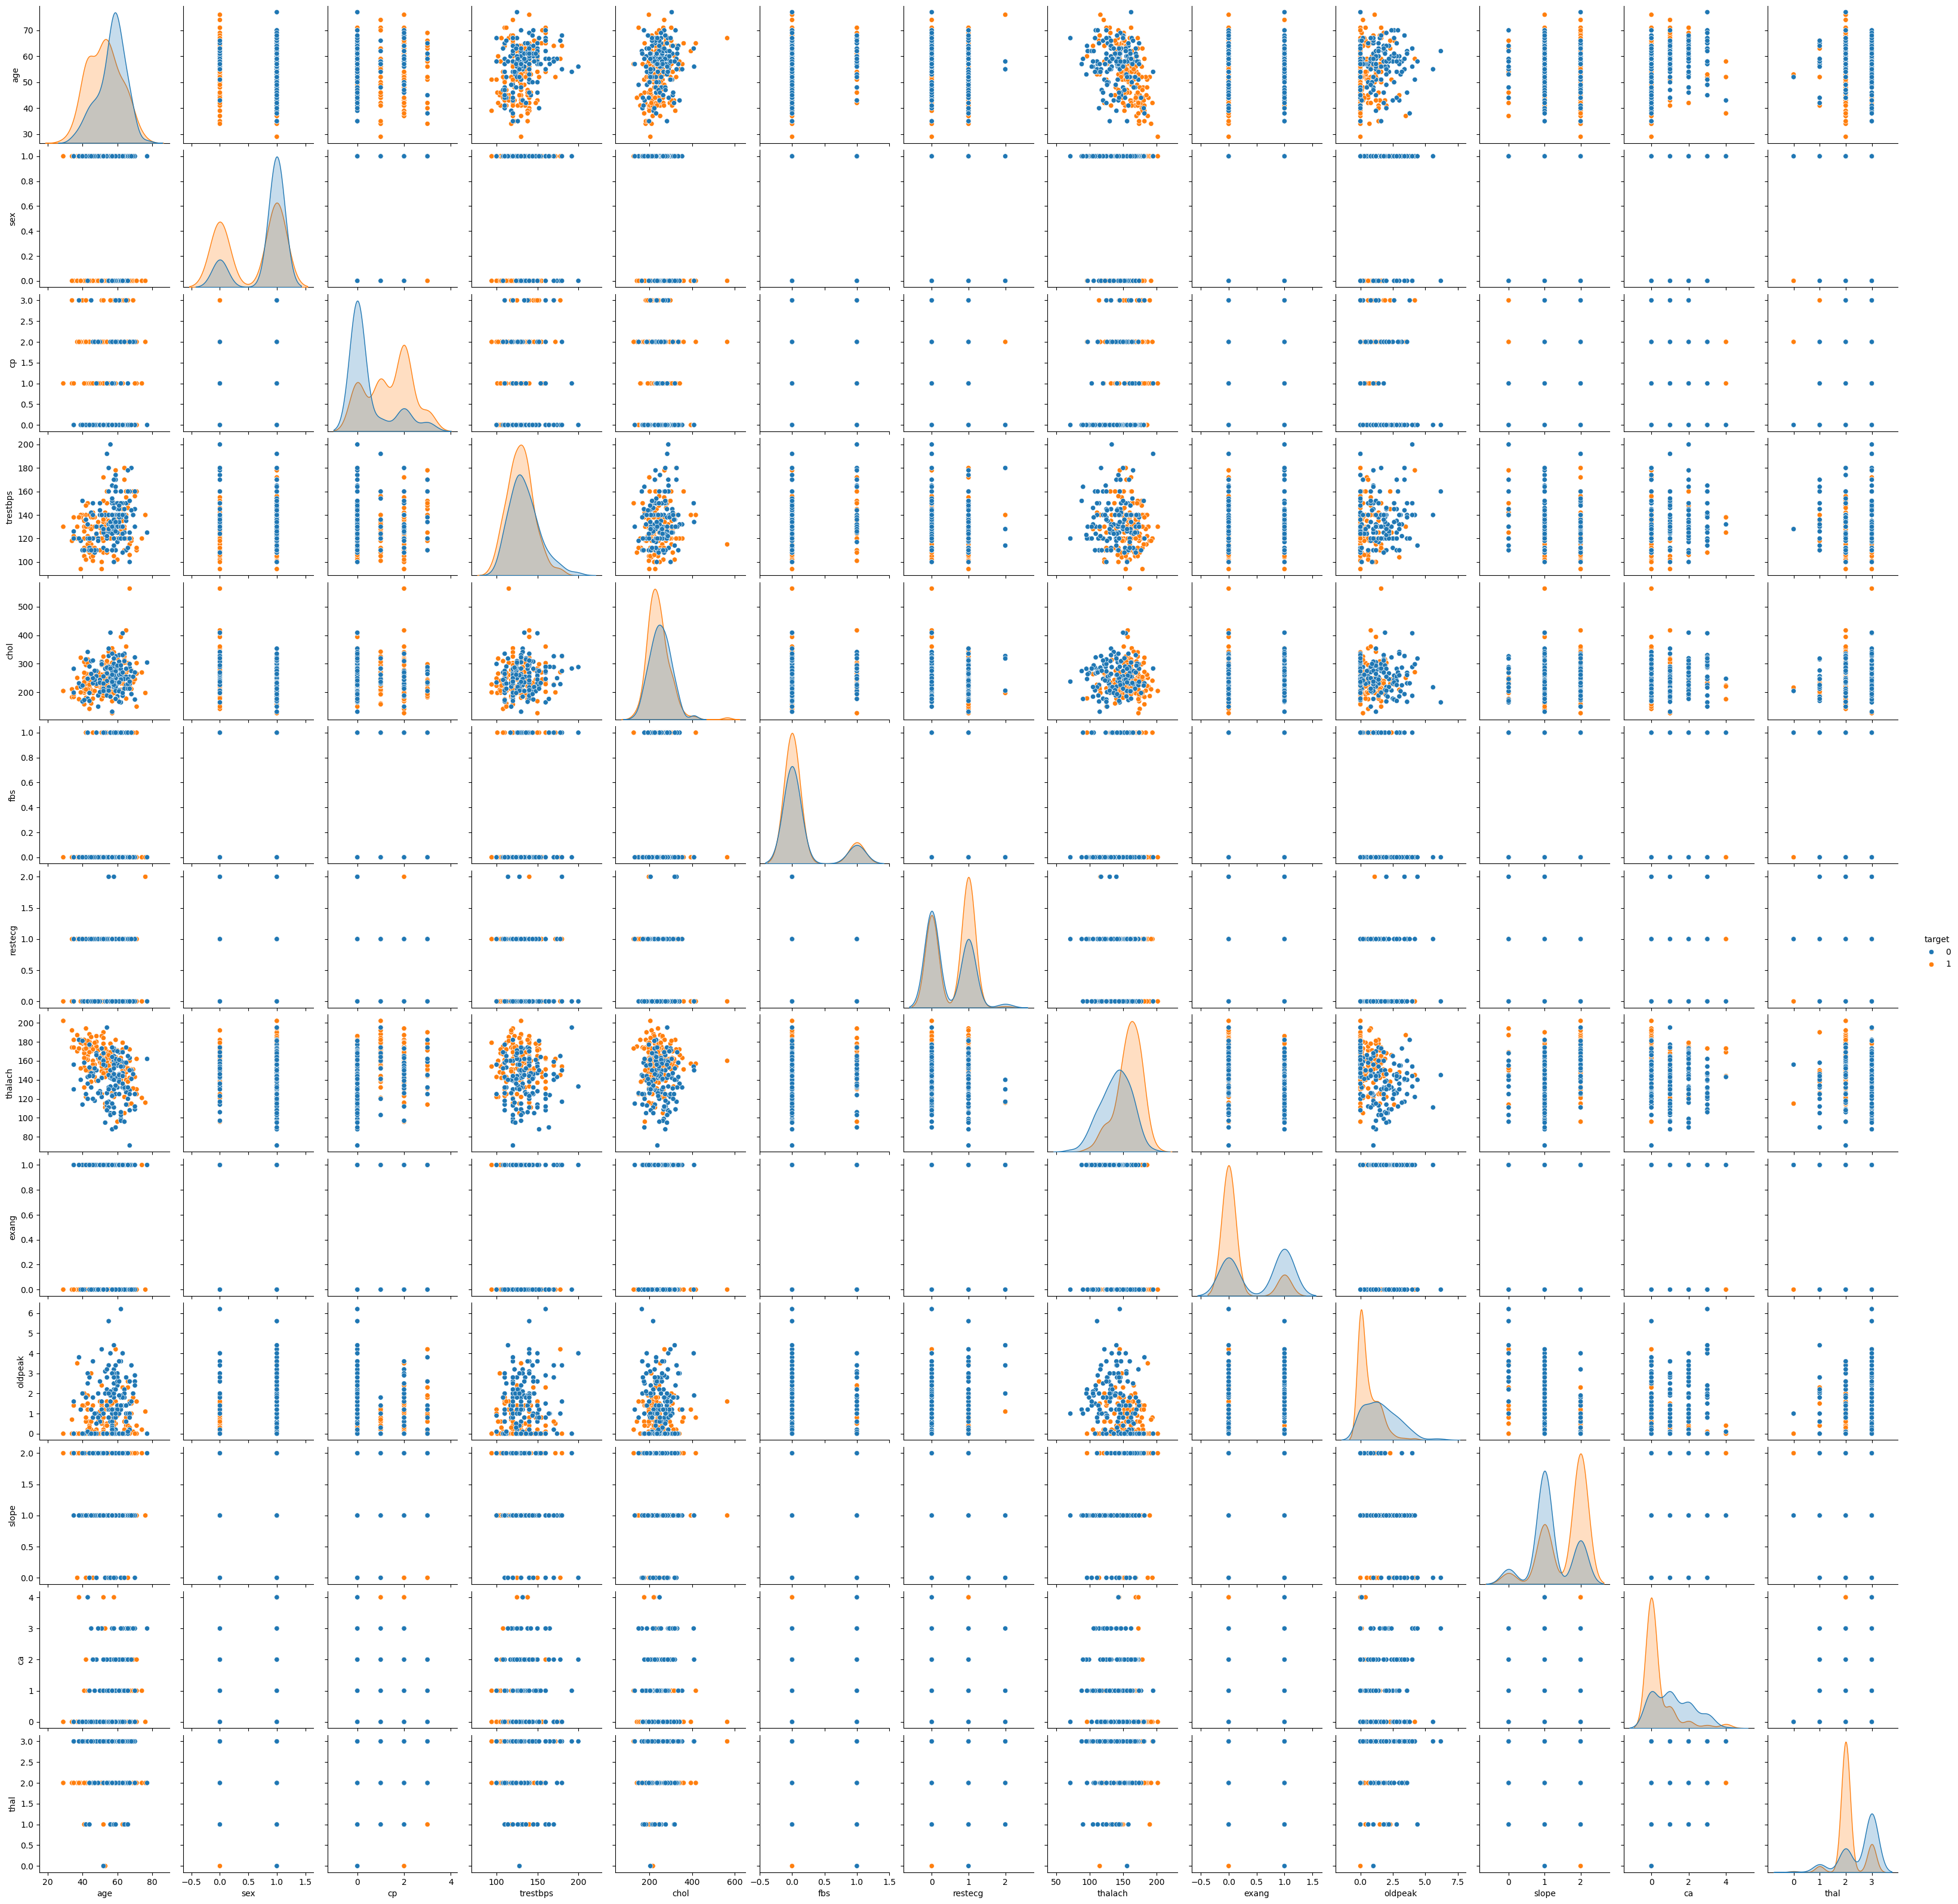

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/Users/daniyalrosli/fyp/heart_disease_data.csv')

# Display the first 5 rows of the dataframe
df.head()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()

# Distribution of the target variable
df['target'].value_counts().plot(kind='bar')

#boxplot for all features
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

# Distribution of the features
df.hist(bins=10, figsize=(20,15))

# Correlation matrix
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Pairplot
sns.pairplot(df, hue='target')






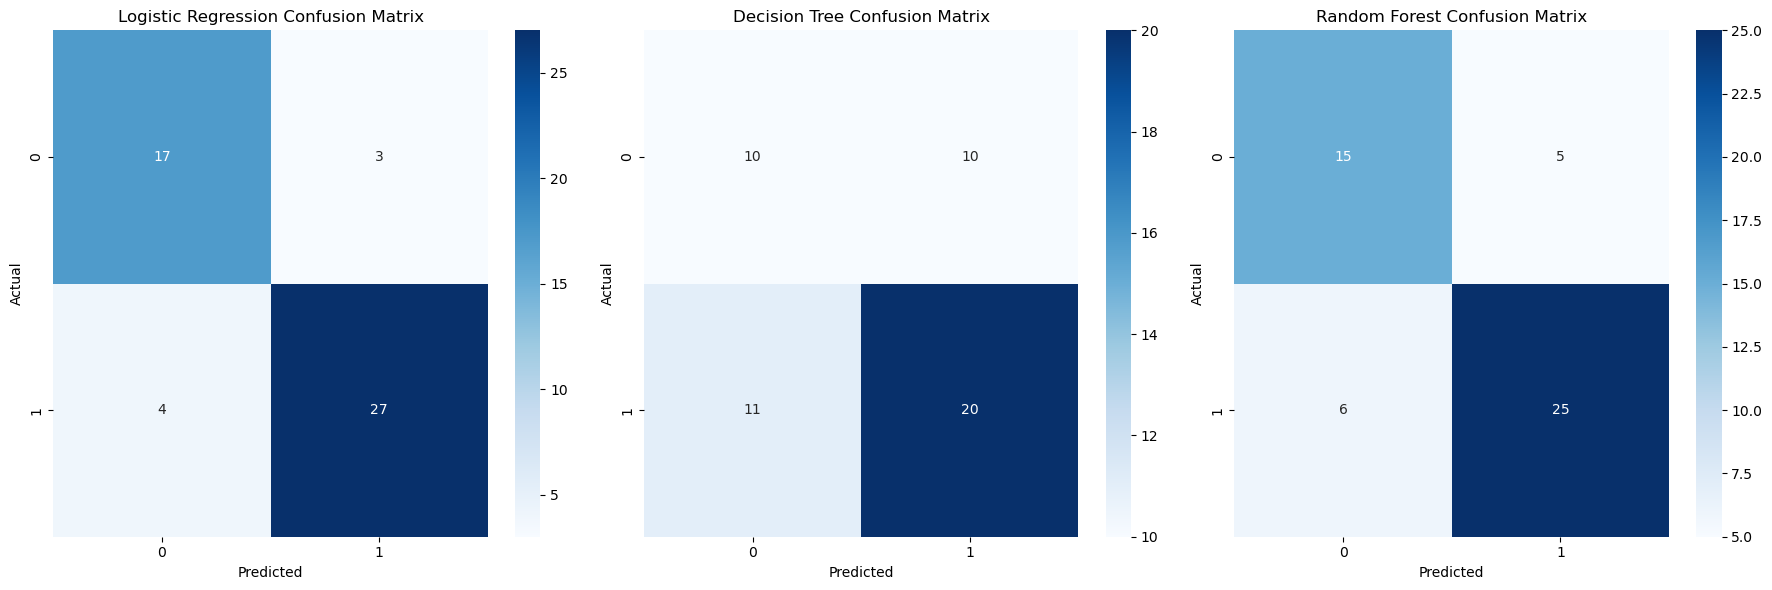

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions for each model
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Generate confusion matrices
lr_conf_matrix = confusion_matrix(y_test, lr_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Random Forest Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

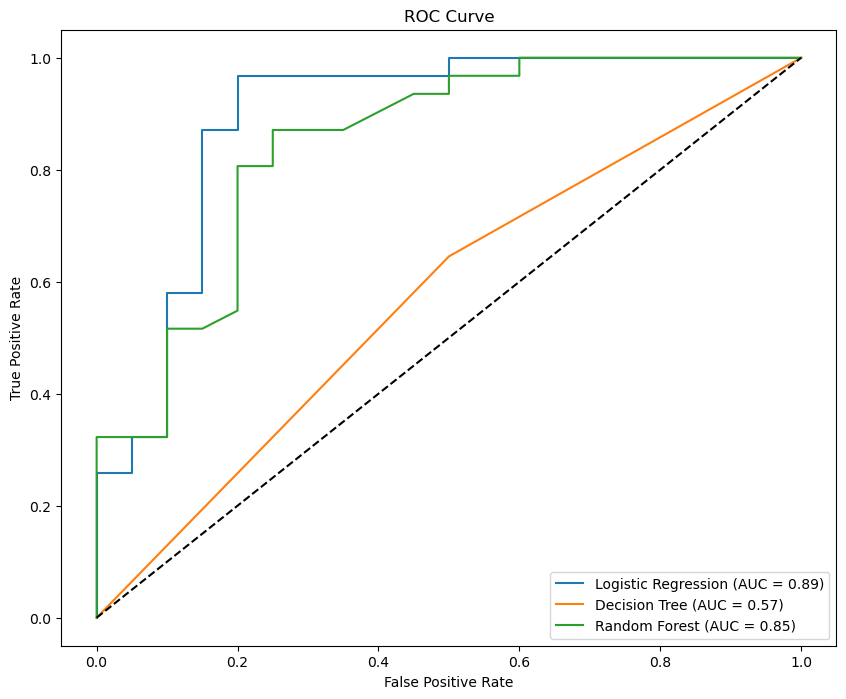

In [31]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve and calculate AUC score
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    
    for model_name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Define the models
models = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

# Plot ROC curve and calculate AUC score
plot_roc_curve(models, X_test, y_test)

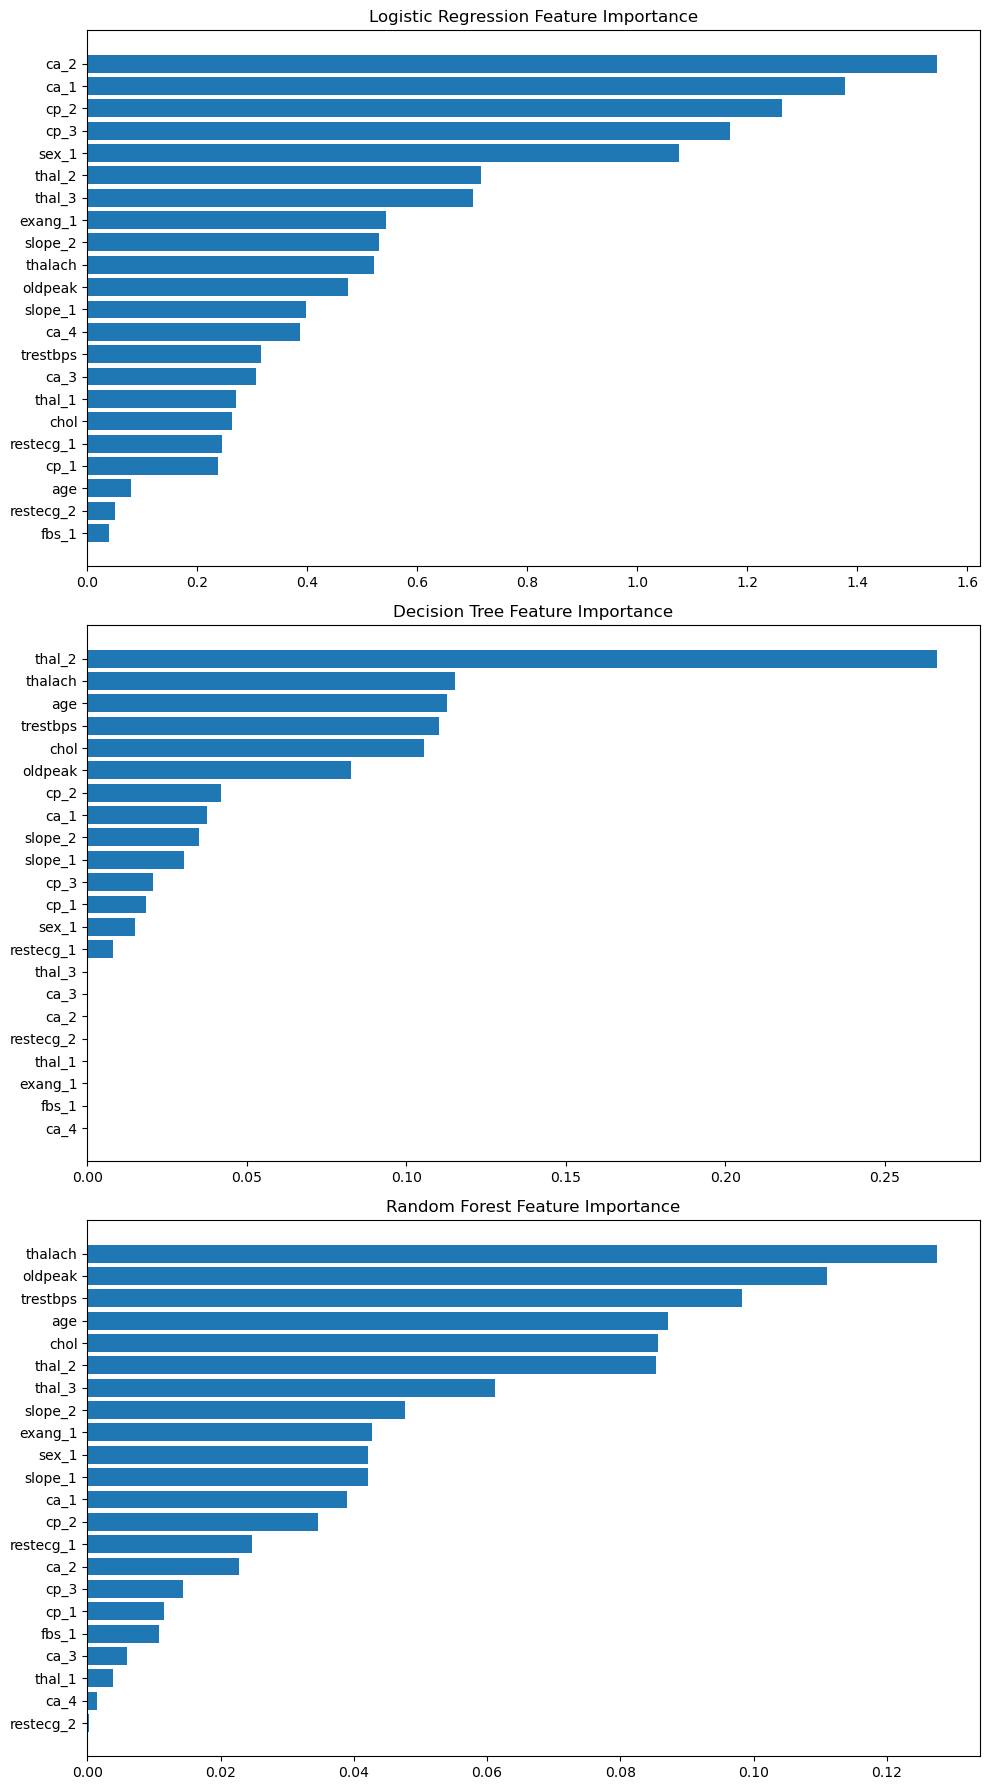

In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Feature importance for Logistic Regression
lr_feature_importances = np.abs(lr_model.coef_[0])
lr_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lr_feature_importances
}).sort_values(by='Importance', ascending=False)

# Feature importance for Decision Tree
dt_feature_importances = dt_model.feature_importances_
dt_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_feature_importances
}).sort_values(by='Importance', ascending=False)

# Feature importance for Random Forest
rf_feature_importances = rf_model.feature_importances_
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance for all models
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Logistic Regression
axes[0].barh(lr_importance_df['Feature'], lr_importance_df['Importance'])
axes[0].set_title('Logistic Regression Feature Importance')
axes[0].invert_yaxis()

# Decision Tree
axes[1].barh(dt_importance_df['Feature'], dt_importance_df['Importance'])
axes[1].set_title('Decision Tree Feature Importance')
axes[1].invert_yaxis()

# Random Forest
axes[2].barh(rf_importance_df['Feature'], rf_importance_df['Importance'])
axes[2].set_title('Random Forest Feature Importance')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

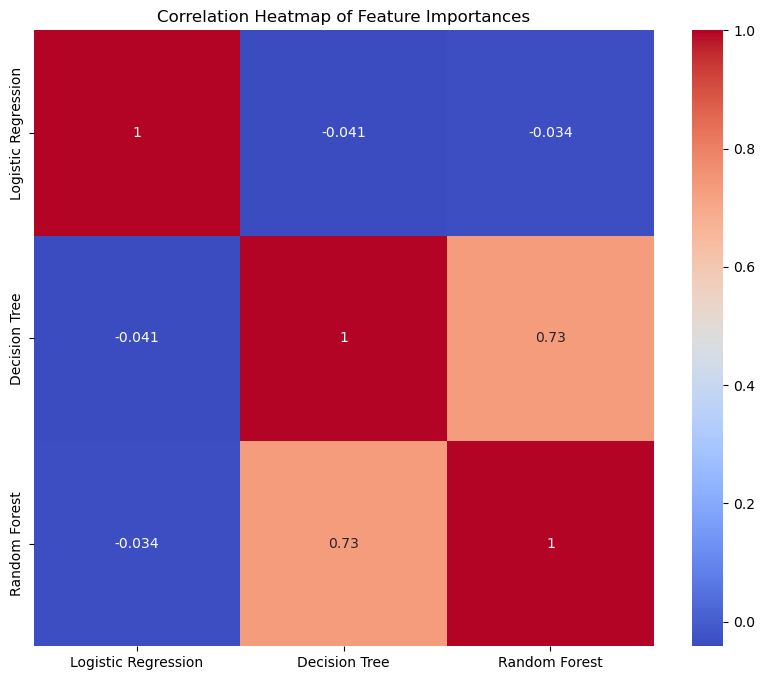

In [33]:
import seaborn as sns

import matplotlib.pyplot as plt

# Combine feature importances into a single DataFrame
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Logistic Regression': lr_feature_importances,
    'Decision Tree': dt_feature_importances,
    'Random Forest': rf_feature_importances
})

# Compute the correlation matrix
correlation_matrix = feature_importances_df.drop('Feature', axis=1).corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Correlation Heatmap of Feature Importances')
plt.show()

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Define and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict using the Logistic Regression model
lr_pred = lr_model.predict(X_test)

# Print classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, lr_pred))

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, lr_pred)
precision = precision_score(y_test, lr_pred)
recall = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.90      0.87      0.89        31

    accuracy                           0.86        51
   macro avg       0.85      0.86      0.86        51
weighted avg       0.86      0.86      0.86        51

Accuracy: 0.86
Precision: 0.90
Recall: 0.87
F1 Score: 0.89
ROC-AUC: 0.89


In [41]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# Assuming dt_model is a trained Decision Tree model
# If not already trained, you can train it as follows:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict using the Decision Tree model
dt_pred = dt_model.predict(X_test)

# Print classification report
print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_pred))

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")    
print(f"ROC-AUC: {roc_auc:.2f}")

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.57      0.65      0.60        20
           1       0.75      0.68      0.71        31

    accuracy                           0.67        51
   macro avg       0.66      0.66      0.66        51
weighted avg       0.68      0.67      0.67        51

Accuracy: 0.67
Precision: 0.75
Recall: 0.68
F1 Score: 0.71
ROC-AUC: 0.66


In [40]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict using the Random Forest model
rf_pred = rf_model.predict(X_test)

# Print classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_pred))

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.83      0.81      0.82        31

    accuracy                           0.78        51
   macro avg       0.77      0.78      0.78        51
weighted avg       0.79      0.78      0.79        51

Accuracy: 0.78
Precision: 0.83
Recall: 0.81
F1 Score: 0.82
ROC-AUC: 0.85


In [43]:
# Display the performance summary table
print(performance_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.862745   0.900000  0.870968  0.885246  0.891935
1        Decision Tree  0.666667   0.750000  0.677419  0.711864  0.663710
2        Random Forest  0.784314   0.833333  0.806452  0.819672  0.845968


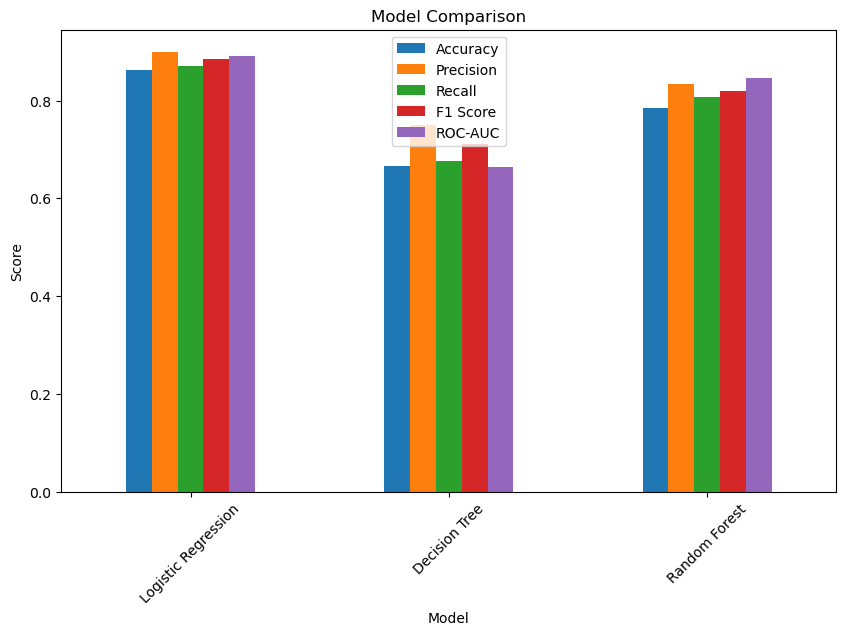

In [23]:
#model comparison visualization

# Plot the comparison
performance_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()



In [24]:
# Identify the optimal model based on the highest accuracy
optimal_model_name = performance_df.loc[performance_df['Accuracy'].idxmax(), 'Model']
optimal_model = models[optimal_model_name]

print(f"The optimal model is: {optimal_model_name}")

The optimal model is: Logistic Regression


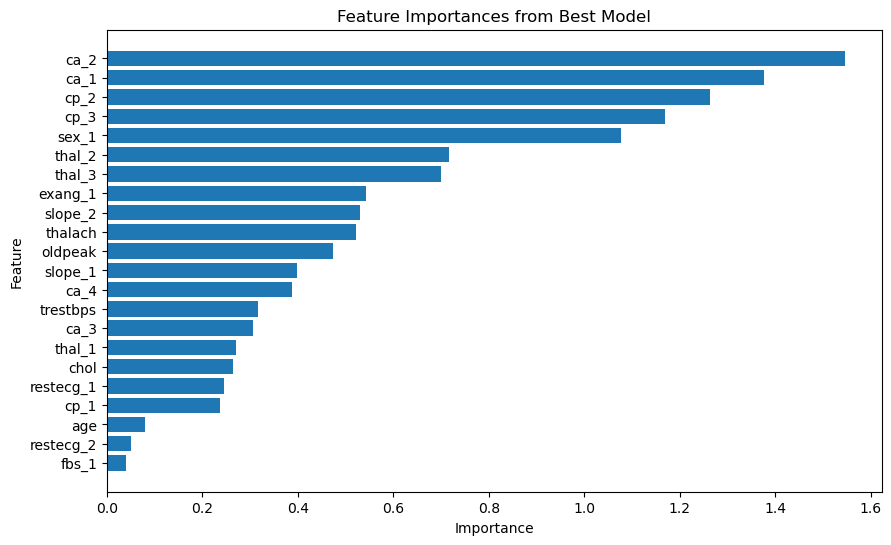

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the best model
feature_importances = np.abs(lr_model.coef_[0])

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Best Model')
plt.gca().invert_yaxis()
plt.show()